#### **This notebook preprocess, visualize the targets and their profession for serbia campaigns**

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from tqdm import tqdm
import sys
import os
import re

import importlib

#### packages
import helper.strategy_helper as st_hp
import helper.visualization as vz_hp
import config.config as config_hp
import helper.pandas_helper as pd_hp
import helper.clean_tweet as cp_hp

[nltk_data] Downloading package stopwords to
[nltk_data]     /N/u/potem/Quartz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
df_serbia = pd.read_pickle('./data/serbia_full_annotation.pkl.gz')

In [30]:
df_serbia.head(1)

,username,description,type,country
0,xhnews,We are public media for the public good. We do...,news media,china


#### **Preprocess type**

In [31]:
def make_correction(type_list):
    '''
    Gets the replacement keys for the elements in list via a user input
    :param type_list: list
    
    :return dictionary
    '''
    all_dic = {}

    for type_of in type_list:
        print('Type : ', type_of)
        user_input = ''

        while user_input == '':
            user_input = input("Type of person: ")

            print("You entered:", user_input, '****** \n')

        all_dic[type_of] = user_input
        
    return all_di

In [32]:
type_list = df_serbia['type'].unique()
len(type_list)

131

In [33]:
type_list

array(['news media', 'state official', 'random', 'sports', 'politician',
       'journalist', 'activist', 'artist', 'media personality',
       'scientist', 'not found', 'ngo', 'professor', 'medical doctor',
       'customer service', 'political party', 'economist', 'news medi',
       'sociologist', 'lawyer', 'entertainment', 'journalism',
       'political page', 'political party account', 'political pary',
       'serbia', 'agronomist', 'political analyst', 'psychologist',
       'researcher', 'state officil', 'Chef', 'Lawyer', 'entrepreneur',
       'writer', 'political scientist', 'state account', 'sport',
       'political account', 'journaist', 'Comedian', 'NGO',
       'state offical', 'Professor', 'State official', 'jouranlist',
       'Parody Account', 'Author', 'State Department Account',
       'Political scientist', 'state offcicial', 'Think Tank',
       'Political Party', 'Politician', 'Social Media Influencer',
       'Random', 'Bot', 'Economist', 'Political Scientist',

In [143]:
df_serbia = pd.read_pickle('./data/serbia_full_annotation.pkl.gz')
df_serbia['type_label'] = -1

#News media
pattern = 'news'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'News Media'

#----------------------------------------------------------------------------

#NGO
pattern = 'ngo|Director General at UNESCO|non-profit|NATO|UN'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'NGO'

#---------------------------------------------------------------------------

#Politician

pattern = 'politician|plitician'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Politician'

#---------------------------------------------------------------------------
#Political party

pattern = 'Political party|political pary'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Political Party'

#-----------------------------------------------------------------------------

#Political Scientist

pattern = 'Political Scientist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Political Scientist'

#------------------------------------------------------------------------------

#state department

pattern = 'state department'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'State Department'


#------------------------------------------------------------------------------

#state department

pattern = 'journ|journaist|journaist|jouranlist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Journalist'

#------------------------------------------------------------------------------

#Media Personality

pattern = 'Media Person'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Media Personality'


#------------------------------------------------------------------------------

#customer

pattern = 'customer'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Customer Service'


#------------------------------------------------------------------------------

# #state official

pattern = 'state offi|state rep|state offcicial'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'State Official'



# #------------------------------------------------------------------------------

# #Activist

pattern = 'Activist|Human right'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Activist'



# #------------------------------------------------------------------------------

# #Political Scientist

pattern = 'Political Scientist|Political Analyst'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Political Scientist'

# #------------------------------------------------------------------------------

# #entertainment

pattern = 'entertainment|Comedian'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Entertainment'

# #------------------------------------------------------------------------------

# #social media influencer

pattern = 'social media influencer'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Social Media Influencer'

# #------------------------------------------------------------------------------

# IT

pattern = 'IT|Computer|Analyst|Cyber security'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=True
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'IT sepcialist'

#------------------------------------------------------------------------------

# Photographer

pattern = 'Photographer'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Photographer'

#------------------------------------------------------------------------------

#Writer

pattern = 'Author|Writer'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Writer'


# random

#------------------------------------------------------------------------------

#Bogger

pattern = 'Blogger'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Blogger'

#------------------------------------------------------------------------------

#repost account

pattern = 'repost account'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Repost Account'

#------------------------------------------------------------------------------

#Parody account

pattern = 'Parody account'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Parody account'


#------------------------------------------------------------------------------

#economist

pattern = 'economist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Economist'

#------------------------------------------------------------------------------

#sports

pattern = 'sports|sport'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Sports'

#------------------------------------------------------------------------------

#Artist

pattern = 'artist|Graphic Designer|designer|artis'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Artist'

#------------------------------------------------------------------------------

#Scientist

pattern = 'scientist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Scientist'

#------------------------------------------------------------------------------

#Scientist

pattern = 'not found'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Not Found'

#------------------------------------------------------------------------------

#professor

pattern = 'professor'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Professor'
#------------------------------------------------------------------------------

#medical doctor

pattern = 'medical doctor|Radiologist|Nurse'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Medical Personnel'

#------------------------------------------------------------------------------

#sociologist

pattern = 'sociologist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Sociologist'

#------------------------------------------------------------------------------

#lawyer

pattern = 'lawyer'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Lawyer'

#------------------------------------------------------------------------------

#political page

pattern = 'political page'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Political Page'

#------------------------------------------------------------------------------

#psychologist

pattern = 'psychologist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Psychologist'

#------------------------------------------------------------------------------

#psychologist

pattern = 'psychologist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Psychologist'

#------------------------------------------------------------------------------

#agronomist

pattern = 'psychologist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Agronomist'

#------------------------------------------------------------------------------

#researcher

pattern = 'researcher|Research'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Researcher'

#------------------------------------------------------------------------------

#entrepreneur

pattern = 'entrepreneur'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Entrepreneur'

#------------------------------------------------------------------------------

#chef

pattern = 'Chef'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Chef'

#------------------------------------------------------------------------------


#'Think Tank'

pattern = 'Think Tank'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Think Tank'


#------------------------------------------------------------------------------

#Bot

pattern = 'Bot'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Bot'

#------------------------------------------------------------------------------

#Freelancer

pattern = 'Freelancer'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Freelancer'

#------------------------------------------------------------------------------

#Sales Manager

pattern = 'Sales Manager'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Sales Manager'

#------------------------------------------------------------------------------

#Digital Investigator
pattern = 'Digital Investigator'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Digital Investigator'

#------------------------------------------------------------------------------

#Army
pattern = 'Army'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Army'


#------------------------------------------------------------------------------

#suspended
pattern = 'suspended'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Suspended'


#------------------------------------------------------------------------------

#Poet
pattern = 'Poet'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Poet'


#------------------------------------------------------------------------------

#ethnologist
pattern = 'ethnologist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Ethnologist'

#------------------------------------------------------------------------------

#Theologist

pattern = 'Theologist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Theologist'

#------------------------------------------------------------------------------

#Theologist

pattern = 'Religious'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Religious Account'

#------------------------------------------------------------------------------

#Religious

pattern = 'Accountant'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Accountant'

#------------------------------------------------------------------------------

#'campaign director'

pattern = 'campaign director'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Campaign Director'

#------------------------------------------------------------------------------

#Engineer

pattern = 'Engineer'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Engineer'

#------------------------------------------------------------------------------

#Social movement

pattern = 'Social movement'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Social Movement Account'


#------------------------------------------------------------------------------

#Geographer

pattern = 'Geographer'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Geographer'

#------------------------------------------------------------------------------

#Marketer

pattern = 'Marketer'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Marketer'
#------------------------------------------------------------------------------

#Archeologist

pattern = 'Archeologist'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Archeologist'

#------------------------------------------------------------------------------

#Education

pattern = 'Education'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Education'


#------------------------------------------------------------------------------

#'Business counsultant'

pattern = 'Business counsultant'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Business Counsultant'


#------------------------------------------------------------------------------
#random

pattern = 'random'
news_values = df_serbia.loc[df_serbia['type'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['type'].unique()
print(news_values)
df_serbia.loc[df_serbia['type'].isin(news_values), 'type_label'] = 'Random'

#------------------------------------------------------------------------------

df_serbia.loc[df_serbia['type_label'] == -1, 'type_label'] = 'Random'


flag1 = df_serbia['type'] == 'not found'
flag2 = df_serbia['country'] == 'not found'

df_serbia.loc[flag1 & flag2, 'type_label'] = 'Account does not exist'

print('Type labels ')

print(df_serbia.loc[df_serbia['type_label'] == -1][['type', 'country']])

print(df_serbia['type_label'].unique())

['news media' 'news medi' 'news paper']
['not found' 'ngo' 'political party account' 'state account'
 'political account' 'NGO' 'Parody Account' 'State Department Account'
 'Political Party Account' 'Political Account' 'Political accounts'
 'Political account' 'Political party account'
 'Director General at UNESCO' 'repost account' 'Religious accoun'
 'Accountant' 'State department account' 'Co-founder (non-profit)'
 'Parody account' 'NATO Secretary General' 'state department account'
 'Account for Social movement' 'Business counsultant' 'UN Envoy']
['politician' 'Politician' 'plitician']
['political party' 'political party account' 'political pary'
 'Political Party' 'Political Party Account' 'Political party account']
['political scientist' 'Political scientist' 'Political Scientist']
['State Department Account' 'State department' 'State department account'
 'state department account']
['journalist' 'journalism' 'journaist' 'jouranlist' 'Journalist']
['media personality' 'Media Perso

In [146]:
df_serbia['type_label'].nunique()

55

In [147]:
df_serbia.columns

Index(['username', 'description', 'type', 'country', 'type_label',
       'country_label'],
      dtype='object')

#### **Preprocess Country**

In [144]:
df_serbia['country_label'] = -1

#China
pattern = 'china'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'China'

#------------------------------------------------------------------------------

#turkey
pattern = 'turkey'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Turkey'

#------------------------------------------------------------------------------

#serbia
pattern = 'erbia|serbia|serbi|serboa|sernbia|seriba|sebia'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Serbia'

#------------------------------------------------------------------------------

#kosovo
pattern = 'kosovo'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Kosovo'

#------------------------------------------------------------------------------

#usa
pattern = 'usa|USA|us'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'USA'

#------------------------------------------------------------------------------

#bulgaria
pattern = 'bulgaria'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Bulgaria'

#------------------------------------------------------------------------------

#france
pattern = 'france'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'France'

#------------------------------------------------------------------------------

#Nicaragua
pattern = 'Nicaragua'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Nicaragua'

#------------------------------------------------------------------------------

#Bosnia
pattern = 'Bosnia'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Bosnia and Herzegovina'

#------------------------------------------------------------------------------

#Austria
pattern = 'Austria'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Austria'

#------------------------------------------------------------------------------

#croatia
pattern = 'croatia'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Croatia'

#------------------------------------------------------------------------------

#canada
pattern = 'canada|canadian'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Canada'

#------------------------------------------------------------------------------

#russia
pattern = 'russia'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Russia'

#------------------------------------------------------------------------------

#russia
pattern = 'czech republic'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Czech Republic'

#------------------------------------------------------------------------------

#montenegro
pattern = 'montenegro'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Montenegro'
#------------------------------------------------------------------------------

#Greece
pattern = 'Greece'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Greece'

#------------------------------------------------------------------------------

#japan
pattern = 'japan'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Japan'

#------------------------------------------------------------------------------

#Ukraine
pattern = 'Ukraine'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Ukraine'


#------------------------------------------------------------------------------

#Ukraine
pattern = 'germany|Gernamy'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Germany'

#------------------------------------------------------------------------------

#Norwa
pattern = 'Norwa'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Norway'

#------------------------------------------------------------------------------

#Luxembourg
pattern = 'Luxembourg'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Luxembourg'

#------------------------------------------------------------------------------

#'Balkan
pattern = 'Balkan'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Balkan Region'

#------------------------------------------------------------------------------

#Brazil
pattern = 'Brazil'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Brazil'


#------------------------------------------------------------------------------

#Romania
pattern = 'Romania'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Romania'

#------------------------------------------------------------------------------

#Brazil
pattern = 'Italy'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Italy'

#------------------------------------------------------------------------------

#UK
pattern = 'UK'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'UK'

#------------------------------------------------------------------------------

#catalonia
pattern = 'catalonia'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Catalonia'


#------------------------------------------------------------------------------

#Denmark
pattern = 'Denmark'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Denmark'

#------------------------------------------------------------------------------

#Slovakia
pattern = 'Slovakia'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Slovakia'
#------------------------------------------------------------------------------

#macedonia
pattern = 'macedonia'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Macedonia'

#------------------------------------------------------------------------------

#Jugoslavija
pattern = 'Jugoslavija|yugoslavia'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Yugoslavia'


#------------------------------------------------------------------------------

#Slovenia
pattern = 'Slovenia'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Slovenia'

#------------------------------------------------------------------------------

#cyprus
pattern = 'cyprus'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Cyprus'

#------------------------------------------------------------------------------

#not fouind
pattern = 'not found|random|not available|notfound|not fond|political party account|notf ound|politician'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Not Available'



#------------------------------------------------------------------------------

#Around the world
pattern = 'Around the world'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Worldwide'


#------------------------------------------------------------------------------

#|Brussels
pattern = 'belgium|Brussels'
news_values = df_serbia.loc[df_serbia['country'].str.contains(f'{pattern}', 
                                                               regex=True, 
                                                               case=False
                                                           )]['country'].unique()
print(news_values)
df_serbia.loc[df_serbia['country'].isin(news_values), 'country_label'] = 'Belgium'


#------------------------------------------------------------------------------

df_serbia.loc[df_serbia['country'].str.strip() == '', 'country_label'] = 'Not Available'
df_serbia.loc[df_serbia['country'] == '', 'country_label'] = 'Not Available'


#------------------------------------------------------------------------------

df_serbia.loc[df_serbia['country'].isnull(), 'country_label'] = 'Not Available'

#------------------------------------------------------------------------------

flag1 = df_serbia['type'] == 'not found'
flag2 = df_serbia['country'] == 'not found'

df_serbia.loc[flag1 & flag2, 'country_label'] = 'Account does not exist'

print('Country labels ')

print(df_serbia['country_label'].unique())

['china']
['turkey' 'Turkey']
['serbia' 'erbia' 'serbi' 'serbian' 'serboa' 'Serbia' 'seriba'
 'serbia (Teacher)' 'sebia' 'serbia (random)' 'sernbia']
['kosovo' 'Kosovo']
['usa' 'australia' 'USA' 'russia' 'us' 'Russia' 'Brussels' 'Austria'
 'Australia' 'suspended' 'austria' 'cyprus']
['bulgaria']
['france']
['Nicaragua']
['bosnia' 'Bosnia' 'Bosnia (Poet)' 'Bosnia and Herzegovina']
['Austria' 'austria']
['croatia' 'Croatia']
['canada' 'canadian']
['russia' 'Russia']
['czech republic' 'Czech Republic']
['montenegro' 'Montenegro']
['greece' 'Greece']
['japan']
['Ukraine']
['germany' 'Germany' 'Gernamy']
['Norwa' 'Norway']
['Luxembourg']
['Balkan' 'Balkan Region (News Media)' 'Balkan Region']
['Brazil']
['Romania' 'romania']
['Italy']
['ukrain' 'Ukraine' 'UK']
['catalonia']
['Denmark']
['Slovakia']
['macedonia']
['yugoslavia' 'Jugoslavija']
['Slovenia']
['cyprus']
['not found' 'random' 'not available' 'political party account' 'notfound'
 'politician' 'notf ound' 'not fond' 'serbia (random)

In [148]:
df_serbia['country_label'].nunique()

36

In [149]:
df_serbia.columns

Index(['username', 'description', 'type', 'country', 'type_label',
       'country_label'],
      dtype='object')

In [156]:
# df_serbia[['username',
#            'description',
#            'type_label',
#            'country_label'
#           ]].to_pickle('./data/serbia_annotated_preprocessed.pkl.gz')

#### **Country Visualization**

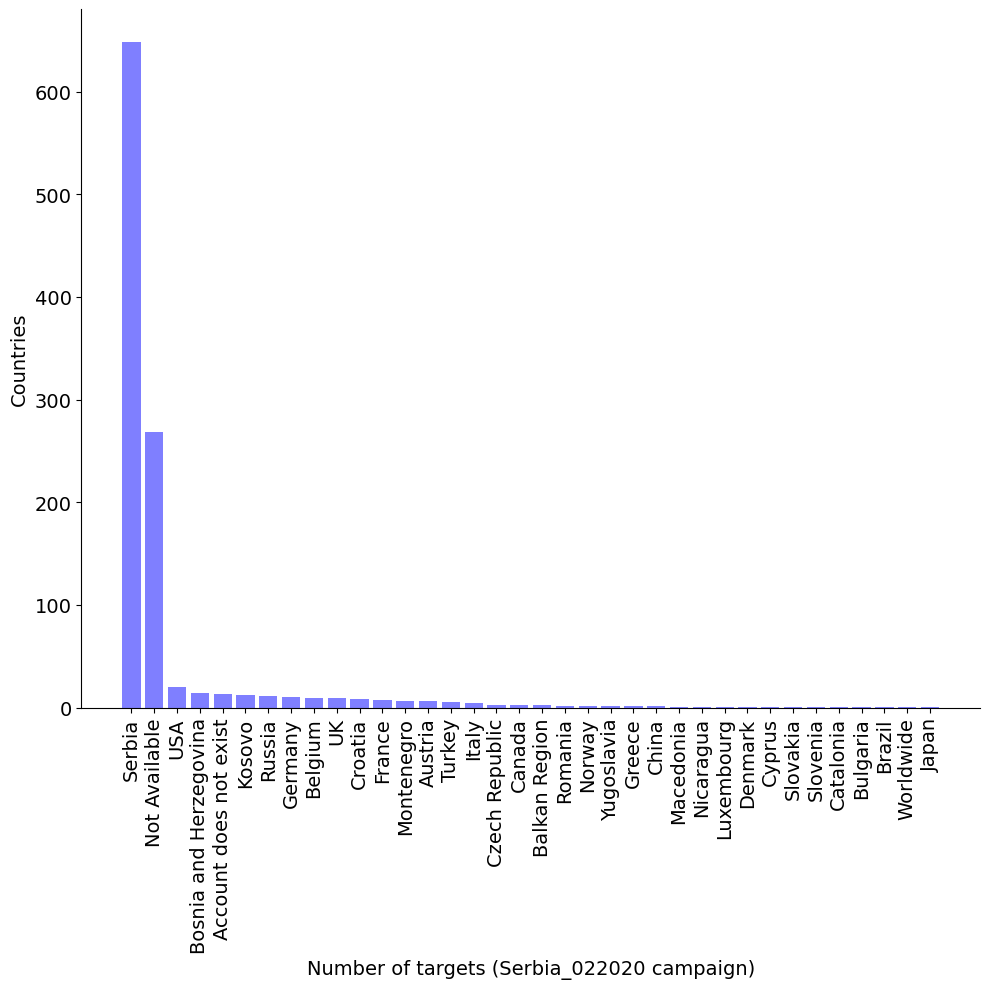

In [167]:
importlib.reload(config_hp)

df_country_grp = (df_serbia.groupby(['country_label'])
                  .size()
                  .to_frame('count')
                  .reset_index()
                 )

df_country_grp = df_country_grp.sort_values(by=['count'],
                                          ascending=False)

# Sample data
x = df_country_grp['country_label'].tolist()
y = df_country_grp['count'].tolist()

parameters =  {
        'fontsize': 14,
        'size': (10, 10),
        'bar': None,
        'x': x,
        'y': y,
        'xlabel': 'Number of targets (Serbia_022020 campaign)', 
        'ylabel': 'Countries',
        'labelrotation': 90,
        'legend_location': '',
        # 'labelrotation': 90,
        # 'title': 'Egypt_022020',
        'save': {
            'path': './plots',
            'filename': 'serbia_022020_target_country.png'
        },
        'random_color': False
    }



vz_hp.bar_graph(parameters)

#### **Target Profession Viz**

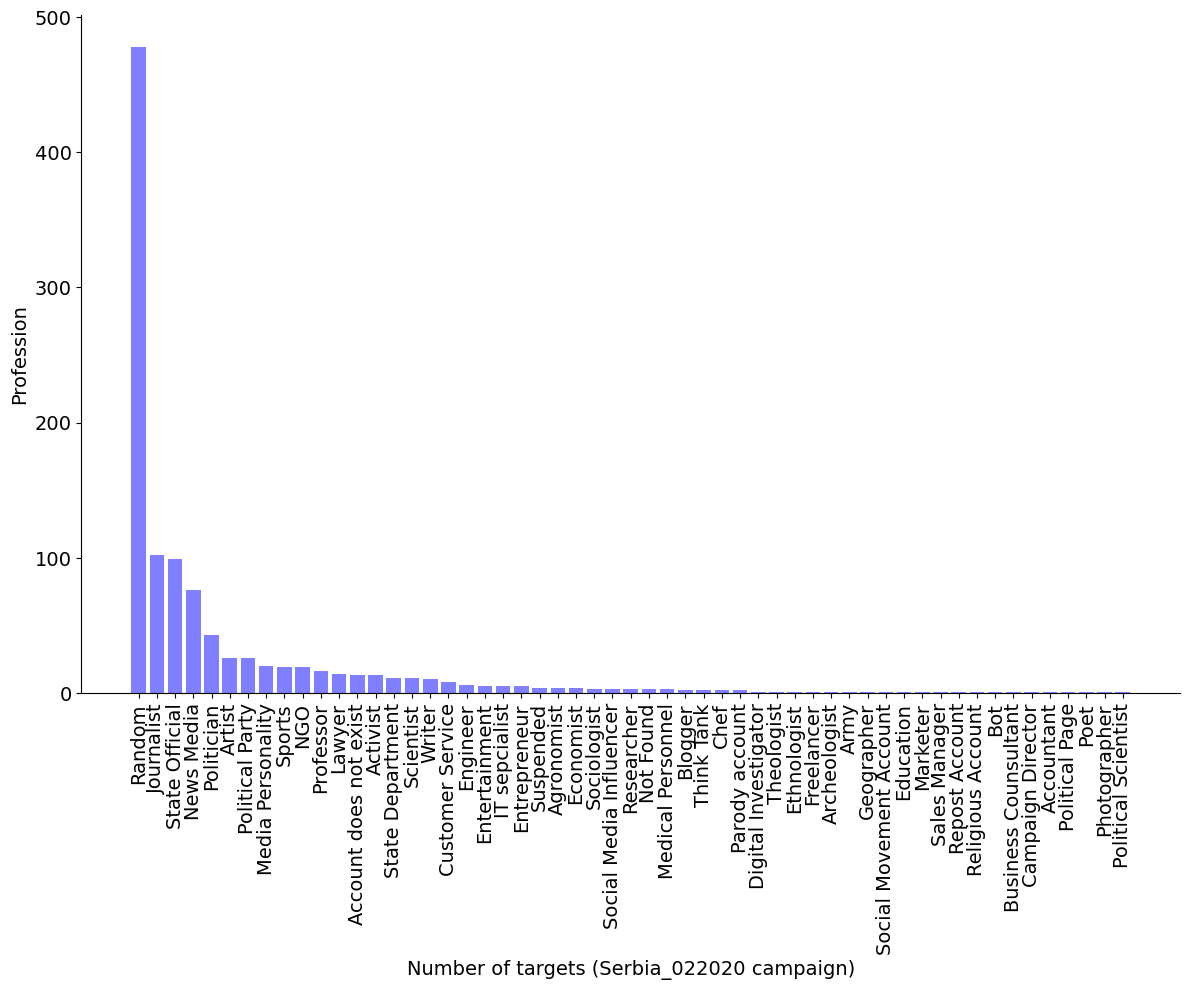

In [171]:
importlib.reload(config_hp)

df_person_grp = (df_serbia.groupby(['type_label'])
                  .size()
                  .to_frame('count')
                  .reset_index()
                 )

df_person_grp = df_person_grp.sort_values(by=['count'],
                                          ascending=False)

# Sample data
x = df_person_grp['type_label'].tolist()
y = df_person_grp['count'].tolist()

parameters =  {
        'fontsize': 14,
        'size': (12, 10),
        'bar': None,
        'x': x,
        'y': y,
        'xlabel': 'Number of targets (Serbia_022020 campaign)', 
        'ylabel': 'Profession',
        'labelrotation': 90,
        'legend_location': '',
        # 'labelrotation': 90,
        # 'title': 'Egypt_022020',
        'save': {
            'path': './plots',
            'filename': 'serbia_022020_target_profession.png'
        },
        'random_color': False
    }



vz_hp.bar_graph(parameters)